In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "2" 
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import Trainer, TrainingArguments
from transformers import pipeline
from datasets import load_dataset
from huggingface_hub import hf_hub_download
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to C:\Users\researcher\.huggingface\token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [3]:
# wandb login --relogin

# Load Datasets

In [4]:
data_files = {"steamclean_processed_300t.csv"}
training_dataset=load_dataset("HFFErica/labelled", data_files=data_files, split="train[:240000]")
validation_dataset=load_dataset("HFFErica/labelled", data_files=data_files, split="train[240000:300000]")

print (training_dataset)
print(validation_dataset)

Using custom data configuration HFFErica--labelled-5d4dba2d06e4f6ce


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\datasets\download\streaming_download_manager.py:697: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Dataset csv downloaded and prepared to C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-5d4dba2d06e4f6ce/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


Using custom data configuration HFFErica--labelled-5d4dba2d06e4f6ce
Found cached dataset csv (C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-5d4dba2d06e4f6ce/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)


Dataset({
    features: ['game_id', 'content', 'label_1', 'label_2', 'preprocessed', 'Column1'],
    num_rows: 240000
})
Dataset({
    features: ['game_id', 'content', 'label_1', 'label_2', 'preprocessed', 'Column1'],
    num_rows: 60000
})


In [5]:
data_files_test = {'test':"testdataset_binarylabel_results2_5000.csv"}
test_dataset_one=load_dataset("HFFErica/labelled", data_files=data_files_test, split="test[:1000]")
test_dataset_two=load_dataset("HFFErica/labelled", data_files=data_files_test, split="test[1000:2000]")
test_dataset_three=load_dataset("HFFErica/labelled", data_files=data_files_test, split="test[2000:3000]")
test_dataset_four=load_dataset("HFFErica/labelled", data_files=data_files_test, split="test[3000:4000]")
test_dataset_five=load_dataset("HFFErica/labelled", data_files=data_files_test, split="test[4000:5000]")


print(test_dataset_one)
print(test_dataset_two)
print(test_dataset_three)
print(test_dataset_four)
print(test_dataset_five)

Using custom data configuration HFFErica--labelled-72b0efcff31242ba


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\datasets\download\streaming_download_manager.py:697: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


Dataset csv downloaded and prepared to C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-72b0efcff31242ba/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


Using custom data configuration HFFErica--labelled-72b0efcff31242ba
Found cached dataset csv (C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-72b0efcff31242ba/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)
Using custom data configuration HFFErica--labelled-72b0efcff31242ba
Found cached dataset csv (C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-72b0efcff31242ba/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)
Using custom data configuration HFFErica--labelled-72b0efcff31242ba
Found cached dataset csv (C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-72b0efcff31242ba/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)
Using custom data configuration HFFErica--labelled-72b0efcff31242ba
Found cached dataset csv (C:/Users/researcher/.cache/huggingface/datasets/HFFErica___csv/HFFErica--labelled-72b0efcff31242ba/0.0.0/652c30

Dataset({
    features: ['_id', 'item_count', 'recommend', 'found_helpful', 'found_funny', 'time', 'reply_count', 'content', 'hrs_on_second', 'hrs_at_reviwer_time', 'reviwer_num', 'recommend_labels', 'replace_name', 'review_length', 'Column1', 'binarylabel_RoBERTa-large', 'binarylabel_RoBERTa-large.1', 'DistilBERT-base-uncased', 'DistilBERT-base-uncased.1', 'Column2'],
    num_rows: 1000
})
Dataset({
    features: ['_id', 'item_count', 'recommend', 'found_helpful', 'found_funny', 'time', 'reply_count', 'content', 'hrs_on_second', 'hrs_at_reviwer_time', 'reviwer_num', 'recommend_labels', 'replace_name', 'review_length', 'Column1', 'binarylabel_RoBERTa-large', 'binarylabel_RoBERTa-large.1', 'DistilBERT-base-uncased', 'DistilBERT-base-uncased.1', 'Column2'],
    num_rows: 1000
})
Dataset({
    features: ['_id', 'item_count', 'recommend', 'found_helpful', 'found_funny', 'time', 'reply_count', 'content', 'hrs_on_second', 'hrs_at_reviwer_time', 'reviwer_num', 'recommend_labels', 'replace_nam

# Change data features

In [6]:
training_dataset.features

{'game_id': Value(dtype='int64', id=None),
 'content': Value(dtype='string', id=None),
 'label_1': Value(dtype='int64', id=None),
 'label_2': Value(dtype='int64', id=None),
 'preprocessed': Value(dtype='string', id=None),
 'Column1': Value(dtype='float64', id=None)}

In [7]:
from datasets import Dataset, Value, ClassLabel, Features

features = training_dataset.features.copy()
features["label_1"] = ClassLabel(names=["negative", "positive"])

def adjust_labels(batch):
    batch["label_1"] = [sentiment for sentiment in batch["label_1"]]
    return batch
training_dataset = training_dataset.map(adjust_labels, batched=True, features=features)

  0%|          | 0/240 [00:00<?, ?ba/s]

In [8]:
training_dataset.features

{'game_id': Value(dtype='int64', id=None),
 'content': Value(dtype='string', id=None),
 'label_1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'label_2': Value(dtype='int64', id=None),
 'preprocessed': Value(dtype='string', id=None),
 'Column1': Value(dtype='float64', id=None)}

In [9]:
validation_dataset.features

{'game_id': Value(dtype='int64', id=None),
 'content': Value(dtype='string', id=None),
 'label_1': Value(dtype='int64', id=None),
 'label_2': Value(dtype='int64', id=None),
 'preprocessed': Value(dtype='string', id=None),
 'Column1': Value(dtype='float64', id=None)}

In [10]:
from datasets import Dataset, Value, ClassLabel, Features

features = validation_dataset.features.copy()
features["label_1"] = ClassLabel(names=["negative", "positive"])

def adjust_labels(batch):
    batch["label_1"] = [sentiment for sentiment in batch["label_1"]]
    return batch
validation_dataset = validation_dataset.map(adjust_labels, batched=True, features=features)

  0%|          | 0/60 [00:00<?, ?ba/s]

In [11]:
validation_dataset.features

{'game_id': Value(dtype='int64', id=None),
 'content': Value(dtype='string', id=None),
 'label_1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'label_2': Value(dtype='int64', id=None),
 'preprocessed': Value(dtype='string', id=None),
 'Column1': Value(dtype='float64', id=None)}

In [12]:
test_dataset_one.features

{'_id': Value(dtype='string', id=None),
 'item_count': Value(dtype='int64', id=None),
 'recommend': Value(dtype='bool', id=None),
 'found_helpful': Value(dtype='int64', id=None),
 'found_funny': Value(dtype='int64', id=None),
 'time': Value(dtype='string', id=None),
 'reply_count': Value(dtype='float64', id=None),
 'content': Value(dtype='string', id=None),
 'hrs_on_second': Value(dtype='float64', id=None),
 'hrs_at_reviwer_time': Value(dtype='float64', id=None),
 'reviwer_num': Value(dtype='int64', id=None),
 'recommend_labels': Value(dtype='int64', id=None),
 'replace_name': Value(dtype='string', id=None),
 'review_length': Value(dtype='int64', id=None),
 'Column1': Value(dtype='int64', id=None),
 'binarylabel_RoBERTa-large': Value(dtype='string', id=None),
 'binarylabel_RoBERTa-large.1': Value(dtype='int64', id=None),
 'DistilBERT-base-uncased': Value(dtype='string', id=None),
 'DistilBERT-base-uncased.1': Value(dtype='int64', id=None),
 'Column2': Value(dtype='bool', id=None)}

In [13]:
from datasets import Dataset, Value, ClassLabel, Features

features = test_dataset_one.features.copy()
features["binarylabel_RoBERTa-large.1"] = ClassLabel(names=["negative", "positive"])
features["DistilBERT-base-uncased.1"] = ClassLabel(names=["negative", "positive"])
features["recommend_labels"] = ClassLabel(names=["notrecommend", "recommend"])


def adjust_labels(batch):
    batch["binarylabel_RoBERTa-large.1"] = [sentiment for sentiment in batch["binarylabel_RoBERTa-large.1"]]
    batch["DistilBERT-base-uncased.1"] = [sentiment for sentiment in batch["DistilBERT-base-uncased.1"]]
    batch["recommend_labels"] = [sentiment for sentiment in batch["recommend_labels"]]

    return batch
test_dataset_one = test_dataset_one.map(adjust_labels, batched=True, features=features)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [14]:
test_dataset_one.features

{'_id': Value(dtype='string', id=None),
 'item_count': Value(dtype='int64', id=None),
 'recommend': Value(dtype='bool', id=None),
 'found_helpful': Value(dtype='int64', id=None),
 'found_funny': Value(dtype='int64', id=None),
 'time': Value(dtype='string', id=None),
 'reply_count': Value(dtype='float64', id=None),
 'content': Value(dtype='string', id=None),
 'hrs_on_second': Value(dtype='float64', id=None),
 'hrs_at_reviwer_time': Value(dtype='float64', id=None),
 'reviwer_num': Value(dtype='int64', id=None),
 'recommend_labels': ClassLabel(num_classes=2, names=['notrecommend', 'recommend'], id=None),
 'replace_name': Value(dtype='string', id=None),
 'review_length': Value(dtype='int64', id=None),
 'Column1': Value(dtype='int64', id=None),
 'binarylabel_RoBERTa-large': Value(dtype='string', id=None),
 'binarylabel_RoBERTa-large.1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'DistilBERT-base-uncased': Value(dtype='string', id=None),
 'DistilBERT-base-uncased.1'

In [15]:
features = test_dataset_two.features.copy()
features["binarylabel_RoBERTa-large.1"] = ClassLabel(names=["negative", "positive"])
features["DistilBERT-base-uncased.1"] = ClassLabel(names=["negative", "positive"])
features["recommend_labels"] = ClassLabel(names=["notrecommend", "recommend"])


def adjust_labels(batch):
    batch["binarylabel_RoBERTa-large.1"] = [sentiment for sentiment in batch["binarylabel_RoBERTa-large.1"]]
    batch["DistilBERT-base-uncased.1"] = [sentiment for sentiment in batch["DistilBERT-base-uncased.1"]]
    batch["recommend_labels"] = [sentiment for sentiment in batch["recommend_labels"]]

    return batch
test_dataset_two = test_dataset_two.map(adjust_labels, batched=True, features=features)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [16]:
features = test_dataset_three.features.copy()
features["binarylabel_RoBERTa-large.1"] = ClassLabel(names=["negative", "positive"])
features["DistilBERT-base-uncased.1"] = ClassLabel(names=["negative", "positive"])
features["recommend_labels"] = ClassLabel(names=["notrecommend", "recommend"])


def adjust_labels(batch):
    batch["binarylabel_RoBERTa-large.1"] = [sentiment for sentiment in batch["binarylabel_RoBERTa-large.1"]]
    batch["DistilBERT-base-uncased.1"] = [sentiment for sentiment in batch["DistilBERT-base-uncased.1"]]
    batch["recommend_labels"] = [sentiment for sentiment in batch["recommend_labels"]]

    return batch
test_dataset_three = test_dataset_three.map(adjust_labels, batched=True, features=features)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [17]:
features = test_dataset_four.features.copy()
features["binarylabel_RoBERTa-large.1"] = ClassLabel(names=["negative", "positive"])
features["DistilBERT-base-uncased.1"] = ClassLabel(names=["negative", "positive"])
features["recommend_labels"] = ClassLabel(names=["notrecommend", "recommend"])


def adjust_labels(batch):
    batch["binarylabel_RoBERTa-large.1"] = [sentiment for sentiment in batch["binarylabel_RoBERTa-large.1"]]
    batch["DistilBERT-base-uncased.1"] = [sentiment for sentiment in batch["DistilBERT-base-uncased.1"]]
    batch["recommend_labels"] = [sentiment for sentiment in batch["recommend_labels"]]
    return batch
test_dataset_four = test_dataset_four.map(adjust_labels, batched=True, features=features)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [18]:
features = test_dataset_five.features.copy()
features["binarylabel_RoBERTa-large.1"] = ClassLabel(names=["negative", "positive"])
features["DistilBERT-base-uncased.1"] = ClassLabel(names=["negative", "positive"])
features["recommend_labels"] = ClassLabel(names=["notrecommend", "recommend"])


def adjust_labels(batch):
    batch["binarylabel_RoBERTa-large.1"] = [sentiment for sentiment in batch["binarylabel_RoBERTa-large.1"]]
    batch["DistilBERT-base-uncased.1"] = [sentiment for sentiment in batch["DistilBERT-base-uncased.1"]]
    batch["recommend_labels"] = [sentiment for sentiment in batch["recommend_labels"]]
    return batch
test_dataset_five = test_dataset_five.map(adjust_labels, batched=True, features=features)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [19]:
test_dataset_two.features

{'_id': Value(dtype='string', id=None),
 'item_count': Value(dtype='int64', id=None),
 'recommend': Value(dtype='bool', id=None),
 'found_helpful': Value(dtype='int64', id=None),
 'found_funny': Value(dtype='int64', id=None),
 'time': Value(dtype='string', id=None),
 'reply_count': Value(dtype='float64', id=None),
 'content': Value(dtype='string', id=None),
 'hrs_on_second': Value(dtype='float64', id=None),
 'hrs_at_reviwer_time': Value(dtype='float64', id=None),
 'reviwer_num': Value(dtype='int64', id=None),
 'recommend_labels': ClassLabel(num_classes=2, names=['notrecommend', 'recommend'], id=None),
 'replace_name': Value(dtype='string', id=None),
 'review_length': Value(dtype='int64', id=None),
 'Column1': Value(dtype='int64', id=None),
 'binarylabel_RoBERTa-large': Value(dtype='string', id=None),
 'binarylabel_RoBERTa-large.1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'DistilBERT-base-uncased': Value(dtype='string', id=None),
 'DistilBERT-base-uncased.1'

In [20]:
test_dataset_three.features

{'_id': Value(dtype='string', id=None),
 'item_count': Value(dtype='int64', id=None),
 'recommend': Value(dtype='bool', id=None),
 'found_helpful': Value(dtype='int64', id=None),
 'found_funny': Value(dtype='int64', id=None),
 'time': Value(dtype='string', id=None),
 'reply_count': Value(dtype='float64', id=None),
 'content': Value(dtype='string', id=None),
 'hrs_on_second': Value(dtype='float64', id=None),
 'hrs_at_reviwer_time': Value(dtype='float64', id=None),
 'reviwer_num': Value(dtype='int64', id=None),
 'recommend_labels': ClassLabel(num_classes=2, names=['notrecommend', 'recommend'], id=None),
 'replace_name': Value(dtype='string', id=None),
 'review_length': Value(dtype='int64', id=None),
 'Column1': Value(dtype='int64', id=None),
 'binarylabel_RoBERTa-large': Value(dtype='string', id=None),
 'binarylabel_RoBERTa-large.1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'DistilBERT-base-uncased': Value(dtype='string', id=None),
 'DistilBERT-base-uncased.1'

In [21]:
test_dataset_four.features

{'_id': Value(dtype='string', id=None),
 'item_count': Value(dtype='int64', id=None),
 'recommend': Value(dtype='bool', id=None),
 'found_helpful': Value(dtype='int64', id=None),
 'found_funny': Value(dtype='int64', id=None),
 'time': Value(dtype='string', id=None),
 'reply_count': Value(dtype='float64', id=None),
 'content': Value(dtype='string', id=None),
 'hrs_on_second': Value(dtype='float64', id=None),
 'hrs_at_reviwer_time': Value(dtype='float64', id=None),
 'reviwer_num': Value(dtype='int64', id=None),
 'recommend_labels': ClassLabel(num_classes=2, names=['notrecommend', 'recommend'], id=None),
 'replace_name': Value(dtype='string', id=None),
 'review_length': Value(dtype='int64', id=None),
 'Column1': Value(dtype='int64', id=None),
 'binarylabel_RoBERTa-large': Value(dtype='string', id=None),
 'binarylabel_RoBERTa-large.1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'DistilBERT-base-uncased': Value(dtype='string', id=None),
 'DistilBERT-base-uncased.1'

In [22]:
test_dataset_five.features

{'_id': Value(dtype='string', id=None),
 'item_count': Value(dtype='int64', id=None),
 'recommend': Value(dtype='bool', id=None),
 'found_helpful': Value(dtype='int64', id=None),
 'found_funny': Value(dtype='int64', id=None),
 'time': Value(dtype='string', id=None),
 'reply_count': Value(dtype='float64', id=None),
 'content': Value(dtype='string', id=None),
 'hrs_on_second': Value(dtype='float64', id=None),
 'hrs_at_reviwer_time': Value(dtype='float64', id=None),
 'reviwer_num': Value(dtype='int64', id=None),
 'recommend_labels': ClassLabel(num_classes=2, names=['notrecommend', 'recommend'], id=None),
 'replace_name': Value(dtype='string', id=None),
 'review_length': Value(dtype='int64', id=None),
 'Column1': Value(dtype='int64', id=None),
 'binarylabel_RoBERTa-large': Value(dtype='string', id=None),
 'binarylabel_RoBERTa-large.1': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None),
 'DistilBERT-base-uncased': Value(dtype='string', id=None),
 'DistilBERT-base-uncased.1'

# Counts the number of words in each review

In [23]:
def compute_review_length(example):
    return {"review_length": len(example["preprocessed"].split())}

In [24]:
review_length_training_dataset = training_dataset.map(compute_review_length)
review_length_validation_dataset = validation_dataset.map(compute_review_length)

  0%|          | 0/240000 [00:00<?, ?ex/s]

  0%|          | 0/60000 [00:00<?, ?ex/s]

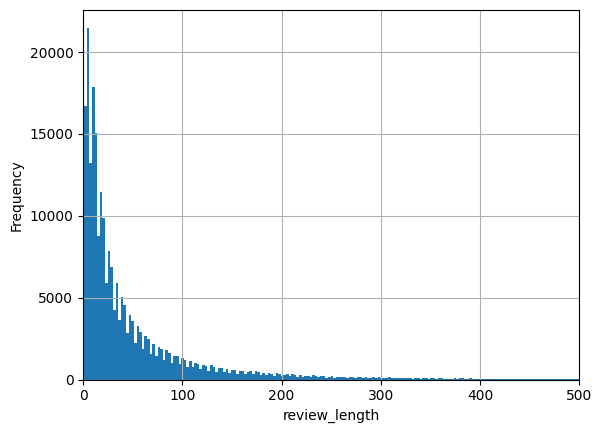

In [25]:
df1=review_length_training_dataset
plt.hist(df1["review_length"],bins=800)
plt.xlabel('review_length')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.grid(True)
plt.show()

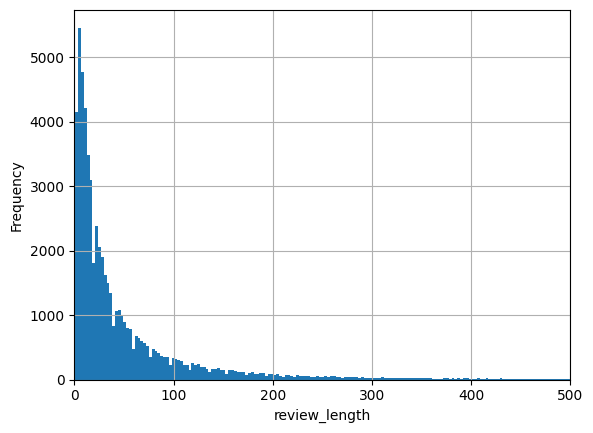

In [26]:
df2=review_length_validation_dataset
plt.hist(df2["review_length"],bins=800)
plt.xlabel('review_length')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.grid(True)
plt.show()

# Model + tokenizer

In [27]:
training_dataset = training_dataset.map(lambda examples: {'labels': examples['label_1']}, batched=True)
training_dataset[0]

  0%|          | 0/240 [00:00<?, ?ba/s]

{'game_id': 105600,
 'content': 'The best game i ever played',
 'label_1': 1,
 'label_2': 1,
 'preprocessed': 'the best game i ever played',
 'Column1': 0.705981696,
 'labels': 1}

In [28]:
validation_dataset = validation_dataset.map(lambda examples: {'labels': examples['label_1']}, batched=True)
test_dataset_one = test_dataset_one.map(lambda examples: {'labels': examples['DistilBERT-base-uncased.1']}, batched=True)
test_dataset_two = test_dataset_two.map(lambda examples: {'labels': examples['DistilBERT-base-uncased.1']}, batched=True)
test_dataset_three = test_dataset_three.map(lambda examples: {'labels': examples['DistilBERT-base-uncased.1']}, batched=True)
test_dataset_four = test_dataset_four.map(lambda examples: {'labels': examples['DistilBERT-base-uncased.1']}, batched=True)
test_dataset_five = test_dataset_five.map(lambda examples: {'labels': examples['DistilBERT-base-uncased.1']}, batched=True)

  0%|          | 0/60 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [29]:
# model_id = 'prajjwal1/bert-tiny'
model_id = 'distilbert-base-uncased-finetuned-sst-2-english'


model = AutoModelForSequenceClassification.from_pretrained(model_id, 
            num_labels=training_dataset.features["label_1"].num_classes)
tokenizer = AutoTokenizer.from_pretrained(model_id)

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\researcher\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [30]:
MAX_LENGTH = 100
training_dataset = training_dataset.map(lambda e: tokenizer(e['preprocessed'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
validation_dataset = validation_dataset.map(lambda e: tokenizer(e['preprocessed'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
test_dataset_one = test_dataset_one.map(lambda e: tokenizer(e['replace_name'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
test_dataset_two = test_dataset_two.map(lambda e: tokenizer(e['replace_name'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
test_dataset_three = test_dataset_three.map(lambda e: tokenizer(e['replace_name'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
test_dataset_four = test_dataset_four.map(lambda e: tokenizer(e['replace_name'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)
test_dataset_five = test_dataset_five.map(lambda e: tokenizer(e['replace_name'], truncation=True, padding='max_length', max_length=MAX_LENGTH), batched=True)

  0%|          | 0/240 [00:00<?, ?ba/s]

  0%|          | 0/60 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [31]:
training_dataset.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])
validation_dataset.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])
test_dataset_one.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])
test_dataset_two.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])
test_dataset_three.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])
test_dataset_four.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])
test_dataset_five.set_format(type='torch', columns=['input_ids',  'attention_mask', 'labels'])

In [32]:
training_dataset

Dataset({
    features: ['game_id', 'content', 'label_1', 'label_2', 'preprocessed', 'Column1', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 240000
})

In [33]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [34]:
training_args = TrainingArguments(
    output_dir='./sentimentbinaryresults',          # output directory
    learning_rate=3e-4,
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,
    do_train=True,
    do_eval=True,
    no_cuda=False,
    load_best_model_at_end=True,
    eval_steps=100,
    evaluation_strategy="steps"
)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=training_dataset,         # training dataset
    eval_dataset=validation_dataset,            # evaluation dataset
    compute_metrics=compute_metrics
)

train_out = trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 240000
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 7500
Automatic Weights & Biases logging enabled, to disa

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.442400,0.344365,0.852217,0.851996,0.853978,0.852078
200,0.341500,0.310443,0.870817,0.870646,0.872436,0.870687
300,0.383000,0.338970,0.871850,0.871725,0.873626,0.871986
400,0.443900,0.426507,0.851417,0.851251,0.852686,0.851299
500,0.432600,0.491526,0.808500,0.804269,0.836233,0.807934
600,0.565700,0.529112,0.772317,0.763544,0.817767,0.771571
700,0.566900,0.588136,0.745017,0.741165,0.759496,0.744548
800,0.643200,0.614998,0.672100,0.654832,0.717223,0.672990
900,0.615200,0.568364,0.718550,0.705808,0.766408,0.719380
1000,0.565700,0.599179,0.682267,0.651225,0.786960,0.683451


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenc

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, labe

***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined

  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels

  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 60000
  Batch size = 32
D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, labe

# Confussion matrix

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Validation_dataset

In [36]:
y_valid = np.array(validation_dataset["label_1"])
preds_output = trainer.predict(validation_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: content, label_1, Column1, label_2, preprocessed, game_id. If content, label_1, Column1, label_2, preprocessed, game_id are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 60000
  Batch size = 32


In [37]:
preds_output.metrics

{'test_loss': 0.49152570962905884,
 'test_accuracy': 0.8085,
 'test_f1': 0.804268520064082,
 'test_precision': 0.8362325716862715,
 'test_recall': 0.8079341685281807,
 'test_runtime': 76.6779,
 'test_samples_per_second': 782.494,
 'test_steps_per_second': 24.453}

In [38]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [39]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

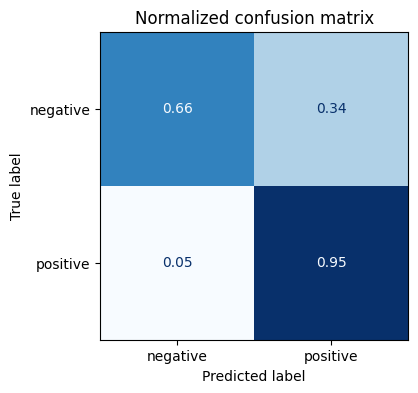

In [40]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

## Test_dataset_one

### DistilBERT-base-uncased.1

In [41]:
y_valid = np.array(test_dataset_one["DistilBERT-base-uncased.1"])
preds_output = trainer.predict(test_dataset_one)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [42]:
preds_output.metrics

{'test_loss': 0.6967101097106934,
 'test_accuracy': 0.701,
 'test_f1': 0.648968330838543,
 'test_precision': 0.7423952858735468,
 'test_recall': 0.6561986863711002,
 'test_runtime': 1.3647,
 'test_samples_per_second': 732.75,
 'test_steps_per_second': 23.448}

In [43]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [44]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

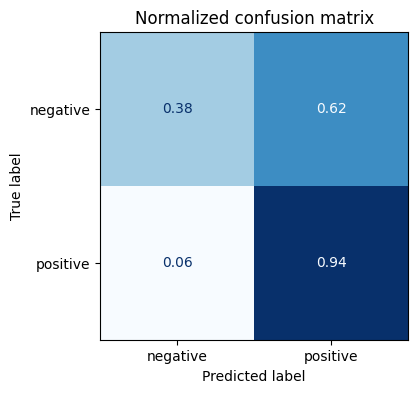

In [45]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### binarylabel_RoBERTa-large.1

In [46]:
y_valid = np.array(test_dataset_one["binarylabel_RoBERTa-large.1"])
preds_output = trainer.predict(test_dataset_one)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [47]:
preds_output.metrics

{'test_loss': 0.6967101097106934,
 'test_accuracy': 0.701,
 'test_f1': 0.648968330838543,
 'test_precision': 0.7423952858735468,
 'test_recall': 0.6561986863711002,
 'test_runtime': 1.3056,
 'test_samples_per_second': 765.914,
 'test_steps_per_second': 24.509}

In [48]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [49]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

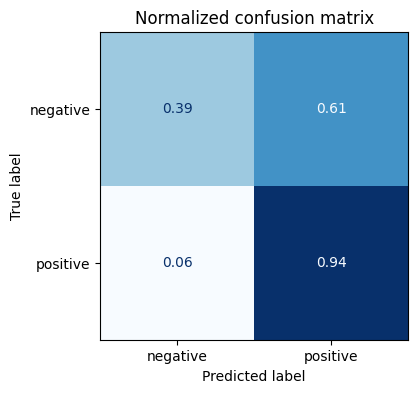

In [50]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### Recommendation

In [51]:
y_valid = np.array(test_dataset_one["recommend_labels"])
preds_output = trainer.predict(test_dataset_one)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [52]:
preds_output = trainer.predict(test_dataset_one)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [53]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [54]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

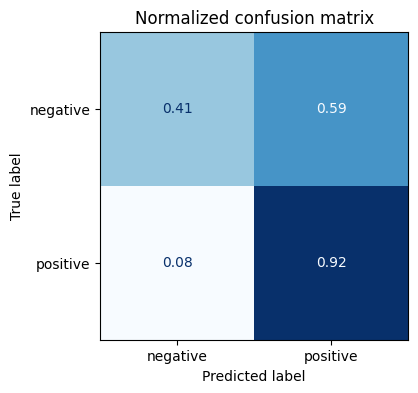

In [55]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

## Test_dataset_two

### DistilBERT-base-uncased.1

In [56]:
y_valid = np.array(test_dataset_two["DistilBERT-base-uncased.1"])
preds_output = trainer.predict(test_dataset_two)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [57]:
preds_output.metrics

{'test_loss': 0.6326614618301392,
 'test_accuracy': 0.733,
 'test_f1': 0.702751717527295,
 'test_precision': 0.7566941257181161,
 'test_recall': 0.7007009958071279,
 'test_runtime': 1.2975,
 'test_samples_per_second': 770.708,
 'test_steps_per_second': 24.663}

In [58]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [59]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

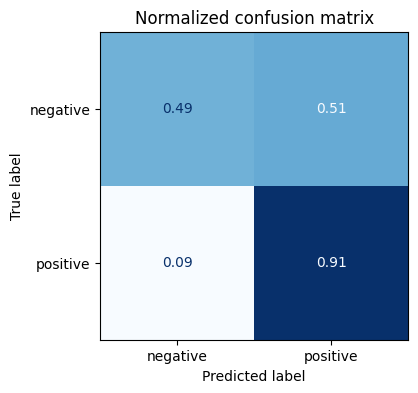

In [60]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### binarylabel_RoBERTa-large.1

In [61]:
y_valid = np.array(test_dataset_two["binarylabel_RoBERTa-large.1"])
preds_output = trainer.predict(test_dataset_two)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [62]:
preds_output.metrics

{'test_loss': 0.6326614618301392,
 'test_accuracy': 0.733,
 'test_f1': 0.702751717527295,
 'test_precision': 0.7566941257181161,
 'test_recall': 0.7007009958071279,
 'test_runtime': 1.3038,
 'test_samples_per_second': 766.973,
 'test_steps_per_second': 24.543}

In [63]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [64]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

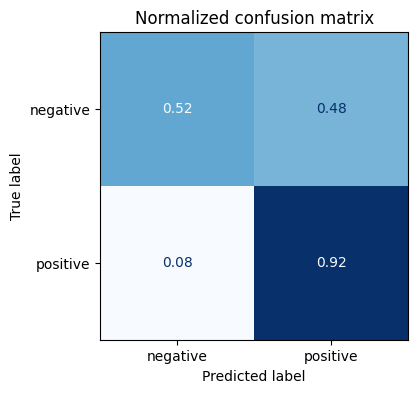

In [65]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### Recommendation

In [66]:
y_valid = np.array(test_dataset_two["recommend_labels"])
preds_output = trainer.predict(test_dataset_one)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [67]:
preds_output.metrics

{'test_loss': 0.6967101097106934,
 'test_accuracy': 0.701,
 'test_f1': 0.648968330838543,
 'test_precision': 0.7423952858735468,
 'test_recall': 0.6561986863711002,
 'test_runtime': 1.3024,
 'test_samples_per_second': 767.827,
 'test_steps_per_second': 24.57}

In [68]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [69]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

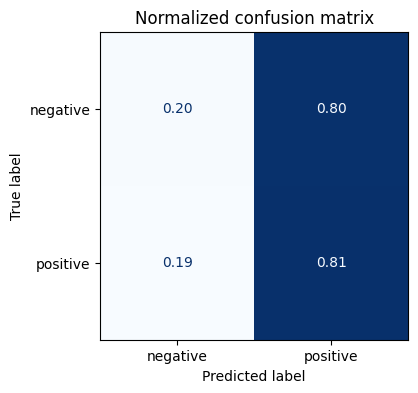

In [70]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

## Test_dataset_three

### DistilBERT-base-uncased.1

In [71]:
y_valid = np.array(test_dataset_three["DistilBERT-base-uncased.1"])
preds_output = trainer.predict(test_dataset_three)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [72]:
preds_output.metrics

{'test_loss': 0.709813117980957,
 'test_accuracy': 0.698,
 'test_f1': 0.6874171966083731,
 'test_precision': 0.6961786625960465,
 'test_recall': 0.6859384561764694,
 'test_runtime': 1.3066,
 'test_samples_per_second': 765.354,
 'test_steps_per_second': 24.491}

In [73]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [74]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

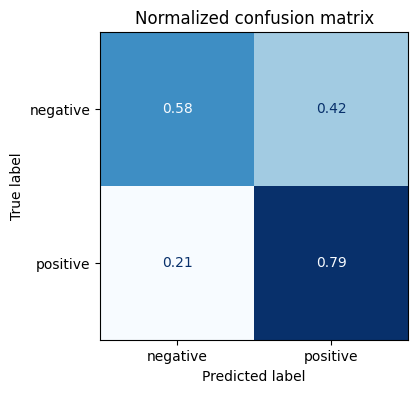

In [75]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### binarylabel_RoBERTa

In [76]:
y_valid = np.array(test_dataset_three["binarylabel_RoBERTa-large.1"])
preds_output = trainer.predict(test_dataset_three)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [77]:
preds_output.metrics

{'test_loss': 0.709813117980957,
 'test_accuracy': 0.698,
 'test_f1': 0.6874171966083731,
 'test_precision': 0.6961786625960465,
 'test_recall': 0.6859384561764694,
 'test_runtime': 1.302,
 'test_samples_per_second': 768.069,
 'test_steps_per_second': 24.578}

In [78]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [79]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

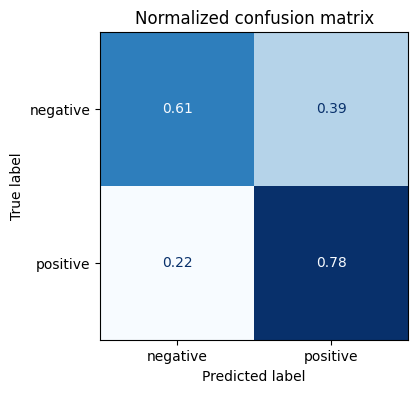

In [80]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### Recommendation

In [81]:
y_valid = np.array(test_dataset_three["recommend_labels"])
preds_output = trainer.predict(test_dataset_three)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [82]:
preds_output.metrics

{'test_loss': 0.709813117980957,
 'test_accuracy': 0.698,
 'test_f1': 0.6874171966083731,
 'test_precision': 0.6961786625960465,
 'test_recall': 0.6859384561764694,
 'test_runtime': 1.2969,
 'test_samples_per_second': 771.047,
 'test_steps_per_second': 24.674}

In [83]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [84]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

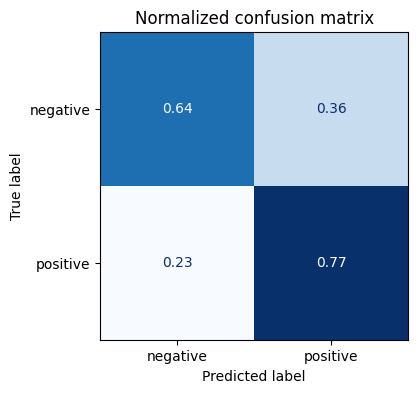

In [85]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

## Test_dataset_four

### DistilBERT-base-uncased.1

In [86]:
y_valid = np.array(test_dataset_four["DistilBERT-base-uncased.1"])
preds_output = trainer.predict(test_dataset_four)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [87]:
preds_output.metrics

{'test_loss': 0.7802667021751404,
 'test_accuracy': 0.677,
 'test_f1': 0.6767979987492183,
 'test_precision': 0.6772433435739887,
 'test_recall': 0.6778302208629831,
 'test_runtime': 1.3085,
 'test_samples_per_second': 764.221,
 'test_steps_per_second': 24.455}

In [88]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [89]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

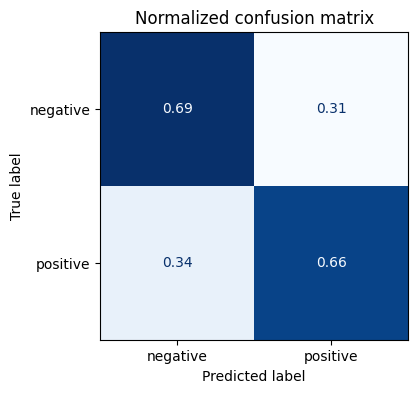

In [90]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### binarylabel_RoBERTa

In [91]:
y_valid = np.array(test_dataset_four["binarylabel_RoBERTa-large.1"])
preds_output = trainer.predict(test_dataset_four)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [92]:
preds_output.metrics

{'test_loss': 0.7802667021751404,
 'test_accuracy': 0.677,
 'test_f1': 0.6767979987492183,
 'test_precision': 0.6772433435739887,
 'test_recall': 0.6778302208629831,
 'test_runtime': 1.3051,
 'test_samples_per_second': 766.236,
 'test_steps_per_second': 24.52}

In [93]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [94]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

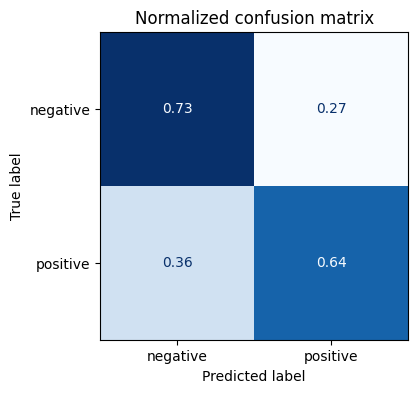

In [95]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### Recommendation

In [96]:
y_valid = np.array(test_dataset_four["recommend_labels"])
preds_output = trainer.predict(test_dataset_four)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [97]:
preds_output.metrics

{'test_loss': 0.7802667021751404,
 'test_accuracy': 0.677,
 'test_f1': 0.6767979987492183,
 'test_precision': 0.6772433435739887,
 'test_recall': 0.6778302208629831,
 'test_runtime': 1.312,
 'test_samples_per_second': 762.21,
 'test_steps_per_second': 24.391}

In [98]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [99]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

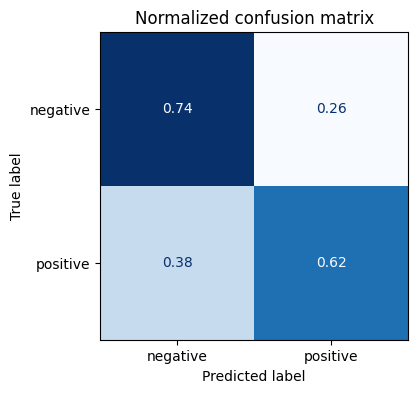

In [100]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

## Test_dataset_five

### DistilBERT-base-uncased.1

In [101]:
y_valid = np.array(test_dataset_five["DistilBERT-base-uncased.1"])
preds_output = trainer.predict(test_dataset_five)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [102]:
preds_output.metrics

{'test_loss': 0.9547708034515381,
 'test_accuracy': 0.597,
 'test_f1': 0.5923326161219805,
 'test_precision': 0.5925021580459653,
 'test_recall': 0.5922222222222222,
 'test_runtime': 1.3064,
 'test_samples_per_second': 765.482,
 'test_steps_per_second': 24.495}

In [103]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [104]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

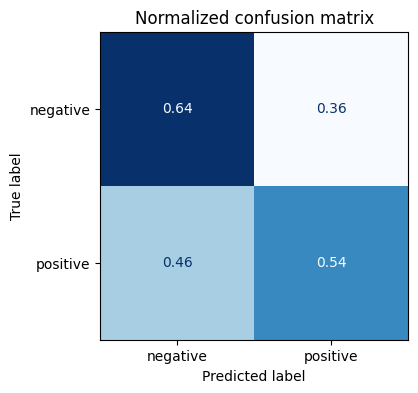

In [105]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### binarylabel_RoBERTa

In [106]:
y_valid = np.array(test_dataset_five["binarylabel_RoBERTa-large.1"])
preds_output = trainer.predict(test_dataset_five)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [107]:
preds_output.metrics

{'test_loss': 0.9547708034515381,
 'test_accuracy': 0.597,
 'test_f1': 0.5923326161219805,
 'test_precision': 0.5925021580459653,
 'test_recall': 0.5922222222222222,
 'test_runtime': 1.3072,
 'test_samples_per_second': 765.016,
 'test_steps_per_second': 24.48}

In [108]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [109]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

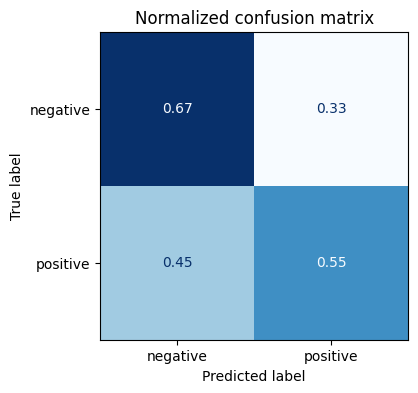

In [110]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)

### Recommendation

In [111]:
y_valid = np.array(test_dataset_five["recommend_labels"])
preds_output = trainer.predict(test_dataset_five)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time. If replace_name, Column1, recommend_labels, hrs_on_second, found_funny, item_count, DistilBERT-base-uncased.1, _id, binarylabel_RoBERTa-large.1, Column2, found_helpful, review_length, recommend, binarylabel_RoBERTa-large, DistilBERT-base-uncased, content, reviwer_num, hrs_at_reviwer_time, reply_count, time are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [112]:
preds_output.metrics

{'test_loss': 0.9547708034515381,
 'test_accuracy': 0.597,
 'test_f1': 0.5923326161219805,
 'test_precision': 0.5925021580459653,
 'test_recall': 0.5922222222222222,
 'test_runtime': 1.3105,
 'test_samples_per_second': 763.077,
 'test_steps_per_second': 24.418}

In [113]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [114]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

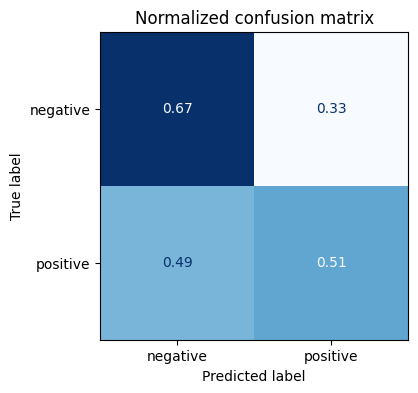

In [115]:
labels = validation_dataset.features["label_1"].names
plot_confusion_matrix(y_preds, y_valid, labels)